# «SC1 min100» Report

Report for the "simple_call_1" (simple call) dataset with config "min100" (all included labels have at least 100 samples).
This test includes only cnn 1d and 2d, each with image and hog features.

 - label extracting config: start/end with 10ms padding
 - hog config: ??
 - spectrogram config: sampling_rate=500000, width=100 window='Ham'

K-Fold with K=8 for 310+124+461 samples, 8 bins of 15+15+15 and a remainder of 190+4+341, for each fold: 760 training, 45 validation, and 90 testing samples
 - val-bins: 1
 - test-bins: 2

## Results of the audio transforms (spectrograms)

'B2, all:310, train:265, val:15, test:30, reminder:190'

,A,B,C,D,E
0,,,,,
1,,,,,
2,,,,,
3,,,,,

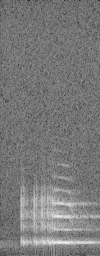
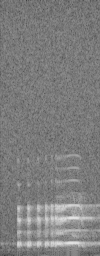
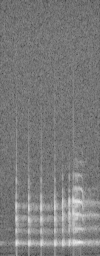
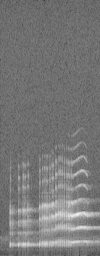
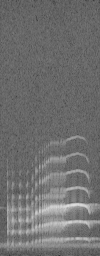
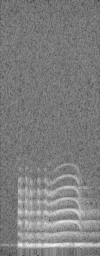
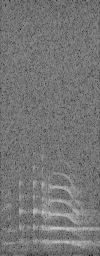
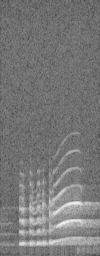
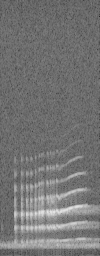
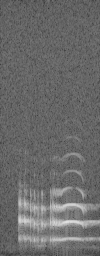
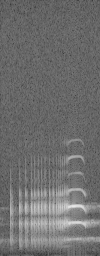
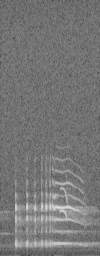
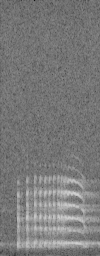
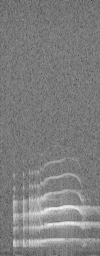
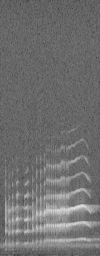
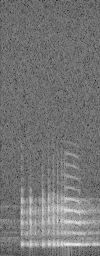
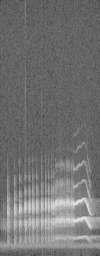
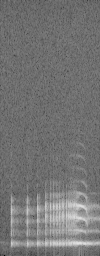
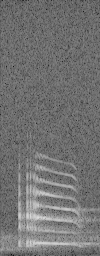
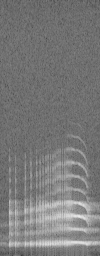

'B3, all:124, train:79, val:15, test:30, reminder:4'

,A,B,C,D,E
0,,,,,
1,,,,,
2,,,,,
3,,,,,

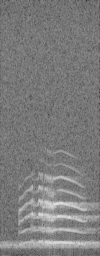
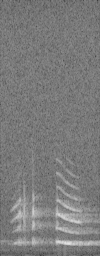
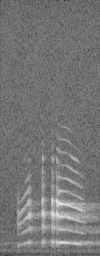
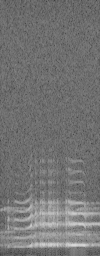
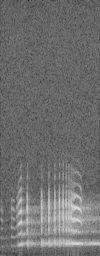
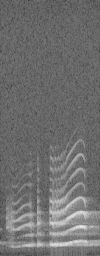
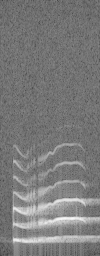
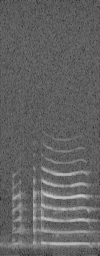
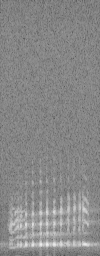
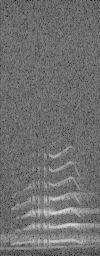
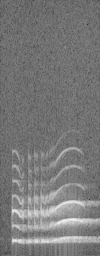
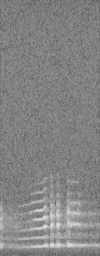
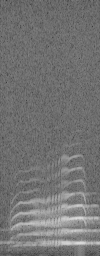
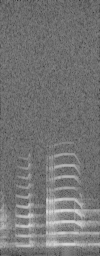
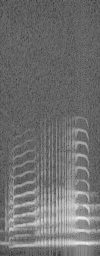
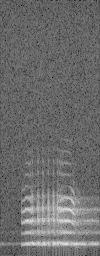
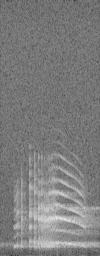
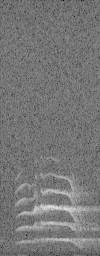
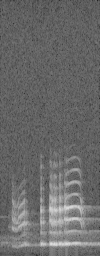
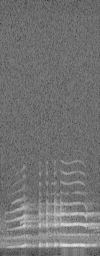

'UPS, all:461, train:416, val:15, test:30, reminder:341'

,A,B,C,D,E
0,,,,,
1,,,,,
2,,,,,
3,,,,,

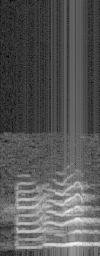
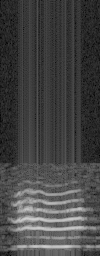
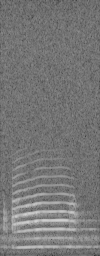
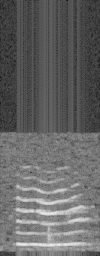
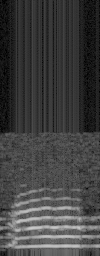
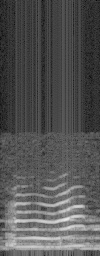
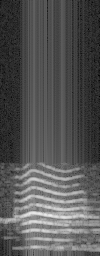
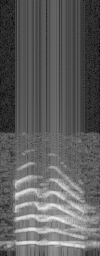
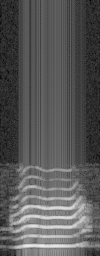
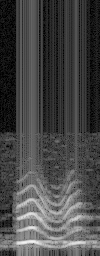
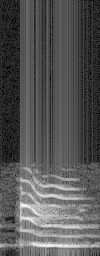
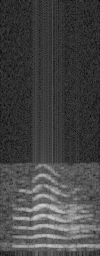
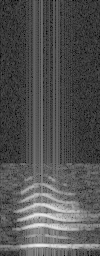
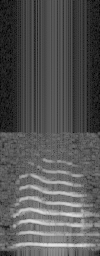
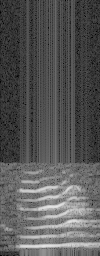
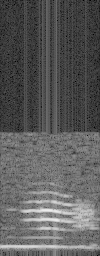
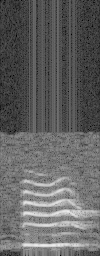
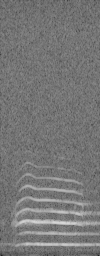
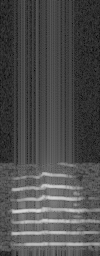
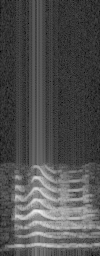

In [1]:
import json, itertools, glob, random, os
import pandas as pd
from IPython.display import display
from engine.settings import BSC_ROOT_DATA_FOLDER, MODELS_FOLDER
from engine.helpers import write_file, read_file
import base64
from IPython.display import Image, HTML
from utils.report import split_acc_loss_plots
from matplotlib import pyplot as plt
from pathlib import Path

bin_size = 15
image_paths = glob.glob(str(BSC_ROOT_DATA_FOLDER / 'simple_call_1' / 'audio' / 'sr500000_w100_wHam') + '/*.png')
labels = ['B2', 'B3', 'UPS']

for label in labels:
	df = pd.DataFrame(columns=['A', 'B', 'C', 'D', 'E'])
	filtered_image_paths = list(filter(lambda image_path: image_path.find('_' +label+'.') != -1, image_paths))
	all = len(filtered_image_paths)
	display(label + ', all:{0}, train:{1}, val:{2}, test:{3}, reminder:{4}'.format(all, all-(3*bin_size), bin_size, bin_size*2, all-(8*bin_size)))

	random_filtered_image_paths = random.sample(filtered_image_paths, 20)
	for row in range(4):
		images = ['<img title="{0:s}" src="data:image/png;base64,{1:s}">'.format(p[len(str(BSC_ROOT_DATA_FOLDER))+1:],base64.b64encode(Image(filename=p).data).decode()) for p in random_filtered_image_paths[row * 5:row * 5 + 5]]
		df.loc[row] = images
	display(HTML(df.to_html(escape=False)))

## Overview of the best Models

In [2]:
result_file = BSC_ROOT_DATA_FOLDER / 'results' / 'testing_sc1_min100.json'
results = json.loads(read_file(result_file))['results']

data = {}
keys = list(map("".join, itertools.product(*[['val', 'test'], ['_acc', '_loss'], ['_m', '_d']])))
for id in results:
	data[id] = {key: results[id][key] for key in keys}

pd.DataFrame().from_dict(data, orient="index")

,val_acc_m,val_acc_d,val_loss_m,val_loss_d,test_acc_m,test_acc_d,test_loss_m,test_loss_d
nn_cnn_2d_sc1_min100_raw_100\k-fold_fe5e-71e3-9752-08ea-bea1-bbfa-d355-6aab\rec_k8_v1t2_e100_bva.report,0.975000,0.025022,0.348859,0.246696,0.938889,0.048250,0.158682,0.121524
nn_cnn_1d_sc1_min100_raw_100\k-fold_fe5e-71e3-9752-08ea-bea1-bbfa-d355-6aab\rec_k8_v1t2_e100_bva.report,0.961111,0.028483,0.450413,0.313091,0.931944,0.027499,0.220723,0.084141
nn_cnn_2d_sc1_min100_hog_100\k-fold_eb64-e9ab-8c60-e7f0-ec99-5631-0090-a9ab\rec_k8_v1t2_e100_bva.report,0.908333,0.069706,0.894989,0.557742,0.838889,0.068751,0.365203,0.077152
nn_cnn_1d_sc1_min100_hog_100\k-fold_eb64-e9ab-8c60-e7f0-ec99-5631-0090-a9ab\rec_k8_v1t2_e100_bva.report,0.869444,0.066600,0.802936,0.156123,0.815278,0.035604,0.416663,0.054114
nn_cnn_2d_sc1_min100_hog_100_3d\k-fold_eb64-e9ab-8c60-e7f0-ec99-5631-0090-a9ab\rec_k8_v1t2_e100_bva.report,0.888889,0.058191,0.875135,0.196877,0.829167,0.045980,0.449172,0.142935


## Statistics

- Error-plots train + valid
- Confusion matrix per report per result

'nn_cnn_2d_sc1_min100_raw_100\\08eab74d0b5cd85e04a8046265760eed34201223\\epoch_100.h5.stats.json'

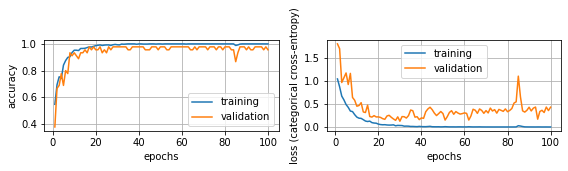

'nn_cnn_2d_sc1_min100_raw_100\\08eab74d0b5cd85e04a8046265760eed34201223\\rec\\rec_65b27739e95d44e54d8fcce1322d98a53110832b_e17.report'

,B2,B3,UPS
B2,30,1,0
B3,0,29,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_raw_100\\6aab690d374074b9fb1efc13b166724d5e70967d\\epoch_100.h5.stats.json'

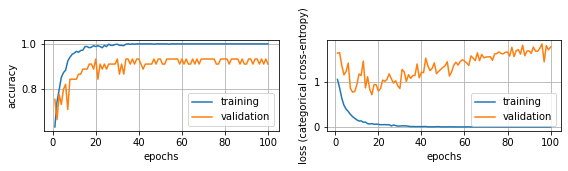

'nn_cnn_2d_sc1_min100_raw_100\\6aab690d374074b9fb1efc13b166724d5e70967d\\rec\\rec_2c32d56b0c843d6b266c6f66890b79a9d2531aff_e20.report'

,B2,B3,UPS
B2,30,5,0
B3,0,25,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_raw_100\\71e34554a7470d38993b874ef0b37708c8d9946b\\epoch_100.h5.stats.json'

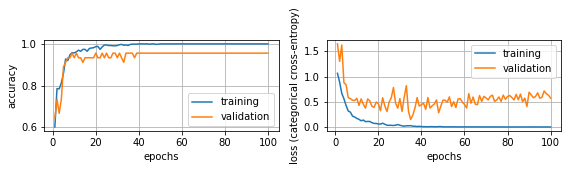

'nn_cnn_2d_sc1_min100_raw_100\\71e34554a7470d38993b874ef0b37708c8d9946b\\rec\\rec_11894503e28c2d77d6f1ba671fec6e86b3e3e48b_e9.report'

,B2,B3,UPS
B2,28,6,0
B3,2,24,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_raw_100\\9752e8a6e62b7468b55ee1048f7ca9b07cc3f820\\epoch_100.h5.stats.json'

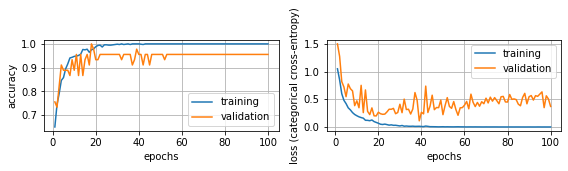

'nn_cnn_2d_sc1_min100_raw_100\\9752e8a6e62b7468b55ee1048f7ca9b07cc3f820\\rec\\rec_22d8257dc238aeb1f865bc485074215ef4b97713_e18.report'

,B2,B3,UPS
B2,29,2,0
B3,1,28,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_raw_100\\bbfa8d847ba1e26b1fb77f752f8d4e4348ea9aa2\\epoch_100.h5.stats.json'

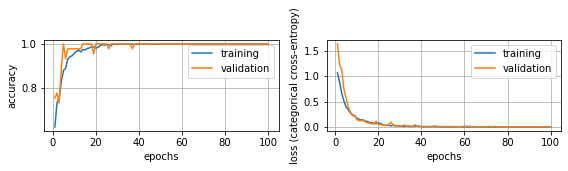

'nn_cnn_2d_sc1_min100_raw_100\\bbfa8d847ba1e26b1fb77f752f8d4e4348ea9aa2\\rec\\rec_338a098a92d4dc83f22b3e8bcf45aad1a8a46001_e5.report'

,B2,B3,UPS
B2,27,8,0
B3,3,21,0
UPS,0,1,30


'nn_cnn_2d_sc1_min100_raw_100\\bea1c669da0bc5b4ee7e663382da64a93f1b6e49\\epoch_100.h5.stats.json'

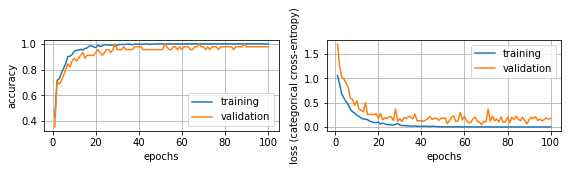

'nn_cnn_2d_sc1_min100_raw_100\\bea1c669da0bc5b4ee7e663382da64a93f1b6e49\\rec\\rec_9a5a549b9098ff7992e4fb63d9bc667b2b2c1c28_e29.report'

,B2,B3,UPS
B2,30,1,0
B3,0,29,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_raw_100\\d3554eeae3b57ce2bc44593795744adf5309fdc1\\epoch_100.h5.stats.json'

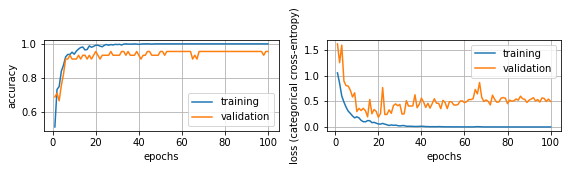

'nn_cnn_2d_sc1_min100_raw_100\\d3554eeae3b57ce2bc44593795744adf5309fdc1\\rec\\rec_c9653743447392033cfd540d6f6a24f886dd0cd0_e20.report'

,B2,B3,UPS
B2,24,4,0
B3,6,25,0
UPS,0,1,30


'nn_cnn_2d_sc1_min100_raw_100\\fe5e5a44a4a6645cb7997a870100b99850b8574a\\epoch_100.h5.stats.json'

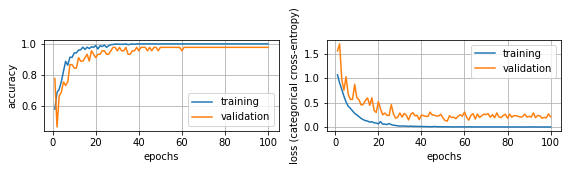

'nn_cnn_2d_sc1_min100_raw_100\\fe5e5a44a4a6645cb7997a870100b99850b8574a\\rec\\rec_eab1deb6f60a0854b752a9867eff1d82d6618897_e28.report'

,B2,B3,UPS
B2,30,3,0
B3,0,27,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_raw_100\\08eab74d0b5cd85e04a8046265760eed34201223\\epoch_100.h5.stats.json'

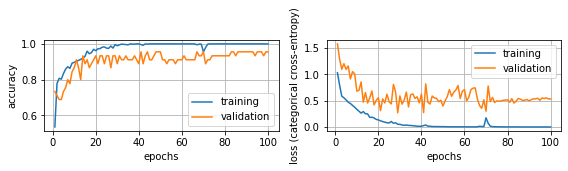

'nn_cnn_1d_sc1_min100_raw_100\\08eab74d0b5cd85e04a8046265760eed34201223\\rec\\rec_65b27739e95d44e54d8fcce1322d98a53110832b_e41.report'

,B2,B3,UPS
B2,27,4,0
B3,2,26,0
UPS,1,0,30


'nn_cnn_1d_sc1_min100_raw_100\\6aab690d374074b9fb1efc13b166724d5e70967d\\epoch_100.h5.stats.json'

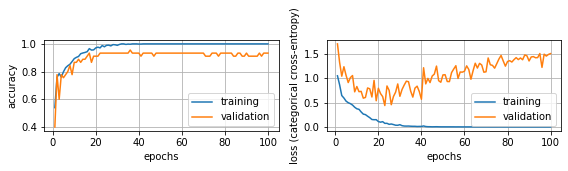

'nn_cnn_1d_sc1_min100_raw_100\\6aab690d374074b9fb1efc13b166724d5e70967d\\rec\\rec_2c32d56b0c843d6b266c6f66890b79a9d2531aff_e36.report'

,B2,B3,UPS
B2,30,3,0
B3,0,26,0
UPS,0,1,30


'nn_cnn_1d_sc1_min100_raw_100\\71e34554a7470d38993b874ef0b37708c8d9946b\\epoch_100.h5.stats.json'

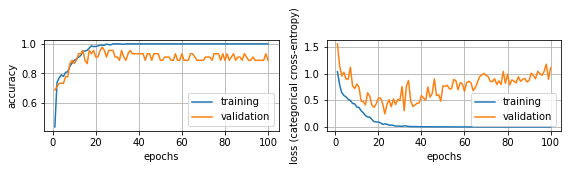

'nn_cnn_1d_sc1_min100_raw_100\\71e34554a7470d38993b874ef0b37708c8d9946b\\rec\\rec_11894503e28c2d77d6f1ba671fec6e86b3e3e48b_e23.report'

,B2,B3,UPS
B2,23,0,0
B3,5,29,0
UPS,2,1,30


'nn_cnn_1d_sc1_min100_raw_100\\9752e8a6e62b7468b55ee1048f7ca9b07cc3f820\\epoch_100.h5.stats.json'

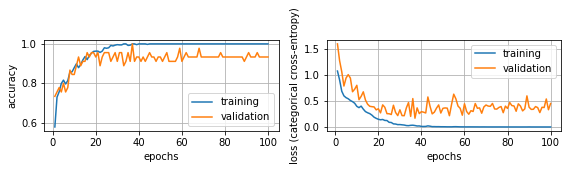

'nn_cnn_1d_sc1_min100_raw_100\\9752e8a6e62b7468b55ee1048f7ca9b07cc3f820\\rec\\rec_22d8257dc238aeb1f865bc485074215ef4b97713_e37.report'

,B2,B3,UPS
B2,29,2,0
B3,0,28,0
UPS,1,0,30


'nn_cnn_1d_sc1_min100_raw_100\\bbfa8d847ba1e26b1fb77f752f8d4e4348ea9aa2\\epoch_100.h5.stats.json'

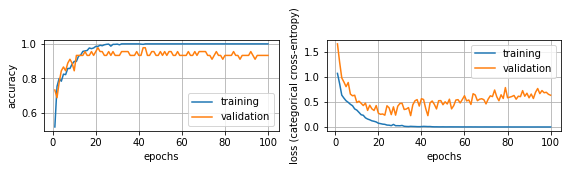

'nn_cnn_1d_sc1_min100_raw_100\\bbfa8d847ba1e26b1fb77f752f8d4e4348ea9aa2\\rec\\rec_338a098a92d4dc83f22b3e8bcf45aad1a8a46001_e21.report'

,B2,B3,UPS
B2,28,5,0
B3,1,24,0
UPS,1,1,30


'nn_cnn_1d_sc1_min100_raw_100\\bea1c669da0bc5b4ee7e663382da64a93f1b6e49\\epoch_100.h5.stats.json'

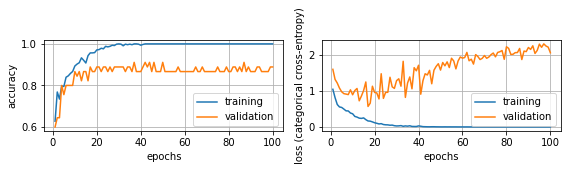

'nn_cnn_1d_sc1_min100_raw_100\\bea1c669da0bc5b4ee7e663382da64a93f1b6e49\\rec\\rec_9a5a549b9098ff7992e4fb63d9bc667b2b2c1c28_e37.report'

,B2,B3,UPS
B2,30,5,0
B3,0,25,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_raw_100\\d3554eeae3b57ce2bc44593795744adf5309fdc1\\epoch_100.h5.stats.json'

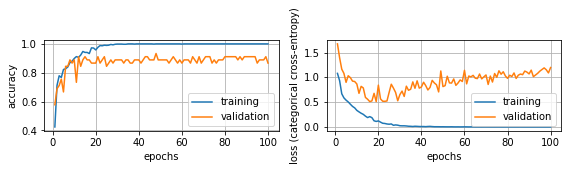

'nn_cnn_1d_sc1_min100_raw_100\\d3554eeae3b57ce2bc44593795744adf5309fdc1\\rec\\rec_c9653743447392033cfd540d6f6a24f886dd0cd0_e48.report'

,B2,B3,UPS
B2,29,9,0
B3,1,21,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_raw_100\\fe5e5a44a4a6645cb7997a870100b99850b8574a\\epoch_100.h5.stats.json'

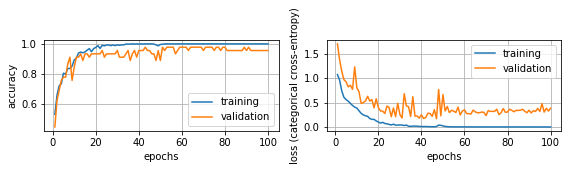

'nn_cnn_1d_sc1_min100_raw_100\\fe5e5a44a4a6645cb7997a870100b99850b8574a\\rec\\rec_eab1deb6f60a0854b752a9867eff1d82d6618897_e43.report'

,B2,B3,UPS
B2,30,4,0
B3,0,26,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100\\009082d3c3ca4ea5f3fd1cac33a0ecf81067e569\\epoch_100.h5.stats.json'

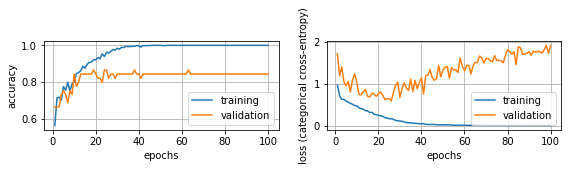

'nn_cnn_2d_sc1_min100_hog_100\\009082d3c3ca4ea5f3fd1cac33a0ecf81067e569\\rec\\rec_b2eaf57992bb4410c6495493bca78a6f5a667bbd_e19.report'

,B2,B3,UPS
B2,21,5,0
B3,9,25,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100\\5631553d8cd1a3e7562e70d8d295ba2d01066cb6\\epoch_100.h5.stats.json'

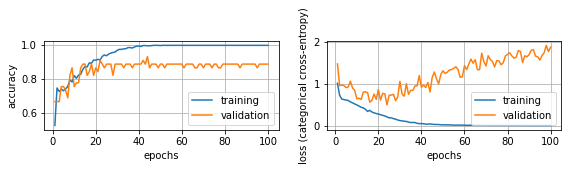

'nn_cnn_2d_sc1_min100_hog_100\\5631553d8cd1a3e7562e70d8d295ba2d01066cb6\\rec\\rec_3ecf9b2c48ac155440b126fe4ddcce5233d861e6_e44.report'

,B2,B3,UPS
B2,25,9,0
B3,5,21,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100\\8c600466b4b4c19c7a07940e6cfb61b6fb6c2eef\\epoch_100.h5.stats.json'

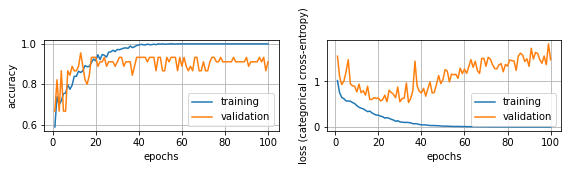

'nn_cnn_2d_sc1_min100_hog_100\\8c600466b4b4c19c7a07940e6cfb61b6fb6c2eef\\rec\\rec_03dd318ea7a1ebfb470d5a669d82dc98dfa2c12e_e13.report'

,B2,B3,UPS
B2,26,20,0
B3,4,10,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100\\a9ab325008724345ef47fabfceeddc29edcf3bb9\\epoch_100.h5.stats.json'

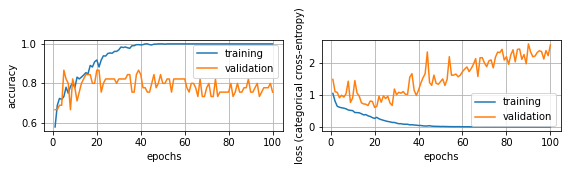

'nn_cnn_2d_sc1_min100_hog_100\\a9ab325008724345ef47fabfceeddc29edcf3bb9\\rec\\rec_f39579ed1c65493642ac0919ba332a57ec3b952e_e5.report'

,B2,B3,UPS
B2,25,5,0
B3,5,25,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100\\e7f040d126f7d75090ea8d3600aa88b4379709f7\\epoch_100.h5.stats.json'

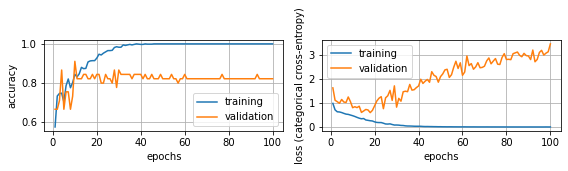

'nn_cnn_2d_sc1_min100_hog_100\\e7f040d126f7d75090ea8d3600aa88b4379709f7\\rec\\rec_89da916ac8f93375e10f02f862e121f38a84b50d_e10.report'

,B2,B3,UPS
B2,12,5,0
B3,16,25,0
UPS,2,0,30


'nn_cnn_2d_sc1_min100_hog_100\\e9abb080c703fcd5b54c870c48f934d4e99cf9ea\\epoch_100.h5.stats.json'

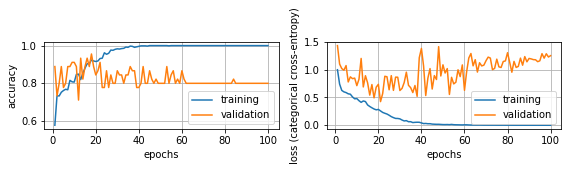

'nn_cnn_2d_sc1_min100_hog_100\\e9abb080c703fcd5b54c870c48f934d4e99cf9ea\\rec\\rec_c072babbe1be8ab1fc8b609676484c012aa974f5_e18.report'

,B2,B3,UPS
B2,21,4,0
B3,9,25,0
UPS,0,1,30


'nn_cnn_2d_sc1_min100_hog_100\\eb640e6f69ddeb6bb0807e9e4956c54a0f9f563e\\epoch_100.h5.stats.json'

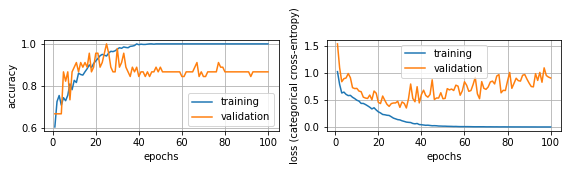

'nn_cnn_2d_sc1_min100_hog_100\\eb640e6f69ddeb6bb0807e9e4956c54a0f9f563e\\rec\\rec_843a652b88cd56a4b26fc632d9d03b6d042cad35_e25.report'

,B2,B3,UPS
B2,27,3,0
B3,3,27,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100\\ec99c0696692d46f523a9bc5085d3d570fb47b44\\epoch_100.h5.stats.json'

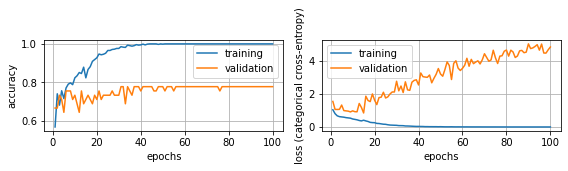

'nn_cnn_2d_sc1_min100_hog_100\\ec99c0696692d46f523a9bc5085d3d570fb47b44\\rec\\rec_1dc1910260e9d4f9e8c4a5db1907c933661ea1a4_e31.report'

,B2,B3,UPS
B2,28,9,0
B3,2,21,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_hog_100\\009082d3c3ca4ea5f3fd1cac33a0ecf81067e569\\epoch_100.h5.stats.json'

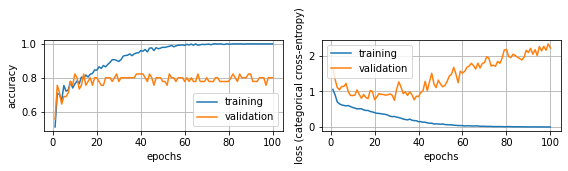

'nn_cnn_1d_sc1_min100_hog_100\\009082d3c3ca4ea5f3fd1cac33a0ecf81067e569\\rec\\rec_b2eaf57992bb4410c6495493bca78a6f5a667bbd_e10.report'

,B2,B3,UPS
B2,18,7,0
B3,12,23,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_hog_100\\5631553d8cd1a3e7562e70d8d295ba2d01066cb6\\epoch_100.h5.stats.json'

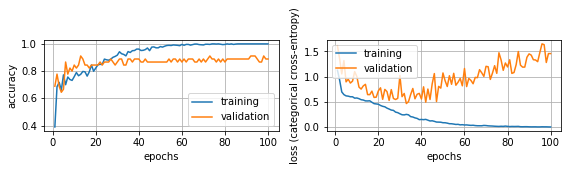

'nn_cnn_1d_sc1_min100_hog_100\\5631553d8cd1a3e7562e70d8d295ba2d01066cb6\\rec\\rec_3ecf9b2c48ac155440b126fe4ddcce5233d861e6_e13.report'

,B2,B3,UPS
B2,26,16,0
B3,4,14,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_hog_100\\8c600466b4b4c19c7a07940e6cfb61b6fb6c2eef\\epoch_100.h5.stats.json'

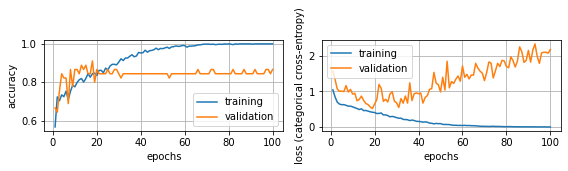

'nn_cnn_1d_sc1_min100_hog_100\\8c600466b4b4c19c7a07940e6cfb61b6fb6c2eef\\rec\\rec_03dd318ea7a1ebfb470d5a669d82dc98dfa2c12e_e18.report'

,B2,B3,UPS
B2,18,8,0
B3,12,22,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_hog_100\\a9ab325008724345ef47fabfceeddc29edcf3bb9\\epoch_100.h5.stats.json'

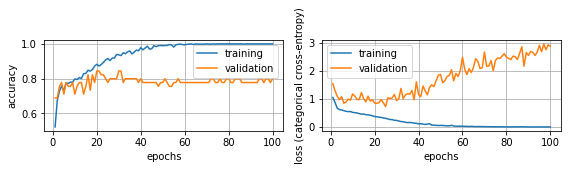

'nn_cnn_1d_sc1_min100_hog_100\\a9ab325008724345ef47fabfceeddc29edcf3bb9\\rec\\rec_f39579ed1c65493642ac0919ba332a57ec3b952e_e20.report'

,B2,B3,UPS
B2,22,4,0
B3,8,26,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_hog_100\\e7f040d126f7d75090ea8d3600aa88b4379709f7\\epoch_100.h5.stats.json'

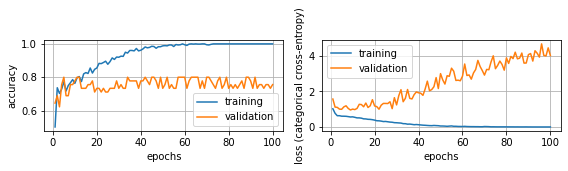

'nn_cnn_1d_sc1_min100_hog_100\\e7f040d126f7d75090ea8d3600aa88b4379709f7\\rec\\rec_89da916ac8f93375e10f02f862e121f38a84b50d_e5.report'

,B2,B3,UPS
B2,20,7,0
B3,9,23,0
UPS,1,0,30


'nn_cnn_1d_sc1_min100_hog_100\\e9abb080c703fcd5b54c870c48f934d4e99cf9ea\\epoch_100.h5.stats.json'

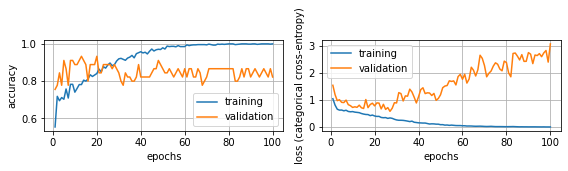

'nn_cnn_1d_sc1_min100_hog_100\\e9abb080c703fcd5b54c870c48f934d4e99cf9ea\\rec\\rec_c072babbe1be8ab1fc8b609676484c012aa974f5_e13.report'

,B2,B3,UPS
B2,25,12,0
B3,5,18,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_hog_100\\eb640e6f69ddeb6bb0807e9e4956c54a0f9f563e\\epoch_100.h5.stats.json'

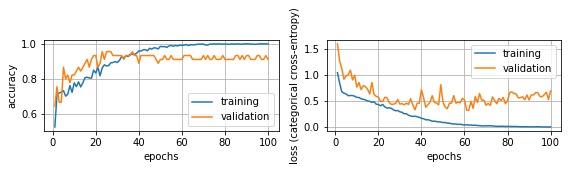

'nn_cnn_1d_sc1_min100_hog_100\\eb640e6f69ddeb6bb0807e9e4956c54a0f9f563e\\rec\\rec_843a652b88cd56a4b26fc632d9d03b6d042cad35_e23.report'

,B2,B3,UPS
B2,26,12,0
B3,4,18,0
UPS,0,0,30


'nn_cnn_1d_sc1_min100_hog_100\\ec99c0696692d46f523a9bc5085d3d570fb47b44\\epoch_100.h5.stats.json'

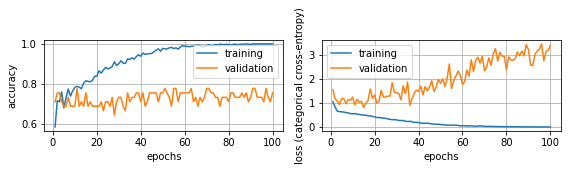

'nn_cnn_1d_sc1_min100_hog_100\\ec99c0696692d46f523a9bc5085d3d570fb47b44\\rec\\rec_1dc1910260e9d4f9e8c4a5db1907c933661ea1a4_e11.report'

,B2,B3,UPS
B2,21,3,0
B3,9,27,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100_3d\\009082d3c3ca4ea5f3fd1cac33a0ecf81067e569\\epoch_100.h5.stats.json'

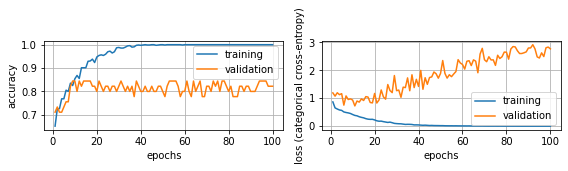

'nn_cnn_2d_sc1_min100_hog_100_3d\\009082d3c3ca4ea5f3fd1cac33a0ecf81067e569\\rec\\rec_b2eaf57992bb4410c6495493bca78a6f5a667bbd_e9.report'

,B2,B3,UPS
B2,27,8,0
B3,3,22,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100_3d\\5631553d8cd1a3e7562e70d8d295ba2d01066cb6\\epoch_100.h5.stats.json'

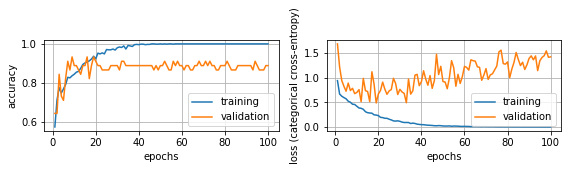

'nn_cnn_2d_sc1_min100_hog_100_3d\\5631553d8cd1a3e7562e70d8d295ba2d01066cb6\\rec\\rec_3ecf9b2c48ac155440b126fe4ddcce5233d861e6_e9.report'

,B2,B3,UPS
B2,22,6,0
B3,8,24,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100_3d\\8c600466b4b4c19c7a07940e6cfb61b6fb6c2eef\\epoch_100.h5.stats.json'

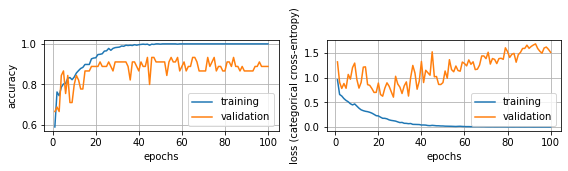

'nn_cnn_2d_sc1_min100_hog_100_3d\\8c600466b4b4c19c7a07940e6cfb61b6fb6c2eef\\rec\\rec_03dd318ea7a1ebfb470d5a669d82dc98dfa2c12e_e44.report'

,B2,B3,UPS
B2,26,15,0
B3,3,11,0
UPS,1,4,30


'nn_cnn_2d_sc1_min100_hog_100_3d\\a9ab325008724345ef47fabfceeddc29edcf3bb9\\epoch_100.h5.stats.json'

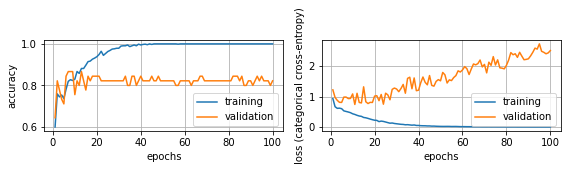

'nn_cnn_2d_sc1_min100_hog_100_3d\\a9ab325008724345ef47fabfceeddc29edcf3bb9\\rec\\rec_f39579ed1c65493642ac0919ba332a57ec3b952e_e7.report'

,B2,B3,UPS
B2,27,9,0
B3,3,21,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100_3d\\e7f040d126f7d75090ea8d3600aa88b4379709f7\\epoch_100.h5.stats.json'

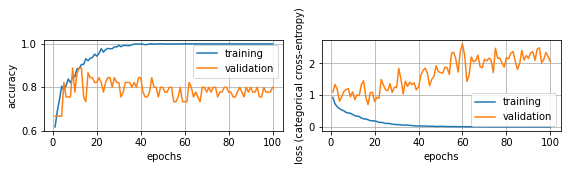

'nn_cnn_2d_sc1_min100_hog_100_3d\\e7f040d126f7d75090ea8d3600aa88b4379709f7\\rec\\rec_89da916ac8f93375e10f02f862e121f38a84b50d_e9.report'

,B2,B3,UPS
B2,22,12,0
B3,7,18,0
UPS,1,0,30


'nn_cnn_2d_sc1_min100_hog_100_3d\\e9abb080c703fcd5b54c870c48f934d4e99cf9ea\\epoch_100.h5.stats.json'

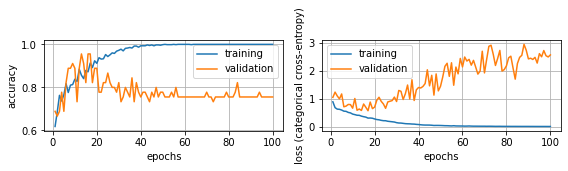

'nn_cnn_2d_sc1_min100_hog_100_3d\\e9abb080c703fcd5b54c870c48f934d4e99cf9ea\\rec\\rec_c072babbe1be8ab1fc8b609676484c012aa974f5_e13.report'

,B2,B3,UPS
B2,25,11,0
B3,5,19,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100_3d\\eb640e6f69ddeb6bb0807e9e4956c54a0f9f563e\\epoch_100.h5.stats.json'

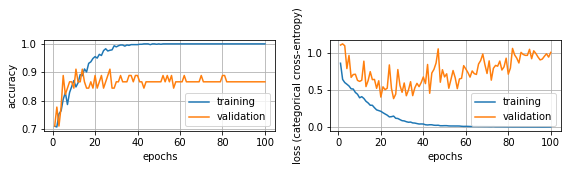

'nn_cnn_2d_sc1_min100_hog_100_3d\\eb640e6f69ddeb6bb0807e9e4956c54a0f9f563e\\rec\\rec_843a652b88cd56a4b26fc632d9d03b6d042cad35_e11.report'

,B2,B3,UPS
B2,27,11,0
B3,3,19,0
UPS,0,0,30


'nn_cnn_2d_sc1_min100_hog_100_3d\\ec99c0696692d46f523a9bc5085d3d570fb47b44\\epoch_100.h5.stats.json'

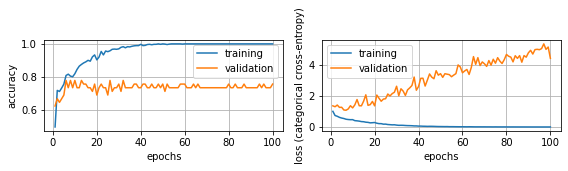

'nn_cnn_2d_sc1_min100_hog_100_3d\\ec99c0696692d46f523a9bc5085d3d570fb47b44\\rec\\rec_1dc1910260e9d4f9e8c4a5db1907c933661ea1a4_e6.report'

,B2,B3,UPS
B2,26,9,0
B3,3,21,0
UPS,1,0,30


In [3]:
for id in results:
	result = results[id]
	model_kFold_path = MODELS_FOLDER / id
	statFiles = model_kFold_path.parent.parent.glob('*/*.stats.json')

	for statFile in statFiles:
		data = json.loads(read_file(statFile))

		if len(data) == 0:continue

		localStatFile = str(statFile)[len(str(MODELS_FOLDER))+1:]
		display(HTML('<h3>Result for: {0:s}<h3>'.format("/".join(localStatFile.split(os.sep)[0:2]))))
		display(localStatFile)
		fig, axes = split_acc_loss_plots(range(1, len(data) + 1),
									 [h['acc'] for h in data],
									 [h['val_acc'] for h in data],
									 [h['loss'] for h in data],
									 [h['val_loss'] for h in data])
		display(fig)
		fig.clear()
		plt.close(fig)

		reports = [json.loads(read_file(f)) for f in Path(statFile).parent.glob('rec/*.report.json')]
		for report in reports:
			display(report['id'])
			display(pd.DataFrame(report['confusion']))


## identifies important pixels

Layer-Wise Relevance Propagation with bounded deep taylor

In [2]:
from utils.report import nn_cnn_2d_lrp
fig = nn_cnn_2d_lrp(MODELS_FOLDER / 'nn_cnn_2d_sc1_min100_raw_100' / 'fe5e5a44a4a6645cb7997a870100b99850b8574a' / 'epoch_100.h5.json', 4)
display(fig)
fig.clear()
plt.close(fig)

Log for interactive will be written in log-2020-10-10_12-43-36
Import pipeline from D:\developement\python\project\bat_syllable_classifier\data\simple_call_1\models\nn_cnn_2d_sc1_min100_raw_100\fe5e5a44a4a6645cb7997a870100b99850b8574a\epoch_100.h5.json
Loaded audio tracks from min100/all.csv


AttributeError: 'NoneType' object has no attribute 'path'